In [96]:
from glob import glob
import pandas as pd
import numpy as np
import torch
import tqdm
import math
import matplotlib.pyplot as plt
import plotly.express as px
import sys
import random

In [2]:
af = glob("Data/AF/*.csv")
normal = glob("Data/NORMAL/*.csv")

In [97]:
random.sample(af, 7500)

ValueError: Sample larger than population or is negative

In [3]:
df = pd.read_csv(af[0], header=None, names=["I", "II", "III", "aVF", "aVR", "aVL", "V1", "V2", "V3", "V4", "V5", "V6"])
df

0        1       2        3        4        5        6       7  \
0     -4.4576  13.7210  15.510  -6.7713  -9.8067   6.5402  -7.3014 -13.953   
1     -5.3565  13.0440  15.787  -5.5925 -10.7160   6.3040  -6.8090 -14.468   
2     -5.6141  13.0040  16.058  -5.1820 -11.2590   6.3962  -6.3240 -15.224   
3     -4.6560  13.6140  15.763  -5.8851 -10.8430   6.5314  -6.0098 -16.465   
4     -2.3879  14.3990  14.334  -7.4512  -9.1422   6.1722  -5.8465 -18.054   
...       ...      ...     ...      ...      ...      ...      ...     ...   
4995  79.0870  12.6710 -67.845 -45.8210  73.4440 -30.9090  -7.3463  85.098   
4996  84.5400   9.5675 -76.434 -46.9910  80.7420 -36.9980 -18.3680  75.810   
4997  85.1480   3.9162 -82.726 -44.2600  84.5290 -43.2680 -29.3750  65.111   
4998  81.1540  -3.9117 -86.594 -37.9320  84.8290 -49.4980 -39.9140  54.117   
4999  74.4740 -13.0260 -89.062 -29.4880  83.0920 -55.7380 -50.0800  43.361   

             8         9        10       11  
0     -9.55270  49.58400  11.24600 -14.8100  
1     -5.43400  50.74900  14.49800  -8.3025  
2     -1.74320  52.15400  17.59500  -2.0830  
3      0.89478  53.60200  20.10200   3.5098  
4      2.03910  54.72300  21.59800   8.3574  
...        ...       ...       ...      ...  
4995  44.77200  18.64400  -0.12432 -40.9370  
4996  36.53700  12.17400  -7.44440 -48.0330  
4997  26.50100   5.52510 -14.87400 -55.6990  
4998  15.56000  -0.65361 -21.72200 -63.5190  
4999   4.37230  -6.31880 -27.97300 -71.3190  

[5000 rows x 12 columns]

In [4]:
def log_transform(x:pd.DataFrame):
    return np.abs(df)/df*np.log10(np.abs(df)+1)

In [11]:
df1 = log_transform(df)
df1

0         1         2         3         4         5         6  \
0    -0.737002  1.167937  1.217747 -0.890494 -1.033693  0.877383 -0.919151   
1    -0.803218  1.147491  1.224973 -0.819050 -1.068779  0.863561 -0.892595   
2    -0.820471  1.146252  1.231928 -0.791129 -1.088455  0.869009 -0.864748   
3    -0.752509  1.164769  1.224352 -0.837910 -1.073462  0.876876 -0.845706   
4    -0.529931  1.187493  1.185655 -0.926918 -1.006132  0.855652 -0.835469   
...        ...       ...       ...       ...       ...       ...       ...   
4995  1.903562  1.135800 -1.837872 -1.670441  1.871830 -1.503913 -0.921494   
4996  1.932169  1.023972 -1.888932 -1.681160  1.912445 -1.579761 -1.287085   
4997  1.935245  0.691630 -1.922860 -1.655715  1.932113 -1.646090 -1.482516   
4998  1.914629 -0.691232 -1.942474 -1.590307  1.933634 -1.703274 -1.611872   
4999  1.877797 -1.146934 -1.954542 -1.484129  1.924755 -1.753874 -1.708251   

             7         8         9        10        11  
0    -1.174728 -1.023364  1.704013  1.087994 -1.198932  
1    -1.189434 -0.808481  1.713902  1.190276 -0.968600  
2    -1.210158 -0.438257  1.725536  1.269396 -0.488974  
3    -1.242169  0.277559  1.737209  1.324324  0.654157  
4    -1.279986  0.482745  1.746034  1.354070  0.971155  
...        ...       ...       ...       ...       ...  
4995  1.934993  1.660600  1.293230 -0.050890 -1.622597  
4996  1.885418  1.574460  1.119718 -0.926569 -1.690488  
4997  1.820274  1.439348  0.814587 -1.200686 -1.753575  
4998  1.741286  1.219060 -0.218433 -1.356447 -1.809688  
4999  1.647001  0.730160 -0.864440 -1.461993 -1.859252  

[5000 rows x 12 columns]

In [83]:
def roller(df:pd.DataFrame, roll_size:int = 1500, stride:int=1):
    return torch.from_numpy(df.to_numpy()).unfold(0, roll_size, stride)

r = roller(df1, 1500, 750)

In [131]:
len(af) * r.element_size() * r.nelement() * 1e-9 * 2

3.204

In [128]:
3.204/(math.ceil((5000-1500)/750)*1500*12*8*1e-9)

4450.0

In [117]:
5*12*1500

90000

In [130]:
3000*r.shape[0]

15000

In [87]:
r.shape

torch.Size([5, 12, 1500])

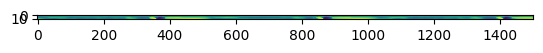

In [88]:
plt.imshow(r[0])

In [108]:
px.line(df1/abs(df1).max(axis="rows"), y=df1.columns)

In [106]:
df/abs(df).max(axis="rows")

0         1         2         3         4         5         6  \
0    -0.005598  0.020730  0.045269 -0.009513 -0.018927  0.024887 -0.020216   
1    -0.006727  0.019707  0.046077 -0.007857 -0.020682  0.023988 -0.018853   
2    -0.007051  0.019646  0.046868 -0.007280 -0.021730  0.024339 -0.017510   
3    -0.005847  0.020568  0.046007 -0.008268 -0.020928  0.024853 -0.016640   
4    -0.002999  0.021754  0.041836 -0.010469 -0.017645  0.023486 -0.016188   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.099326  0.019143 -0.198018 -0.064376  0.141751 -0.117614 -0.020340   
4996  0.106174  0.014455 -0.223087 -0.066020  0.155836 -0.140784 -0.050857   
4997  0.106938  0.005917 -0.241451 -0.062183  0.163146 -0.164642 -0.081333   
4998  0.101922 -0.005910 -0.252741 -0.053292  0.163725 -0.188349 -0.110513   
4999  0.093532 -0.019680 -0.259944 -0.041429  0.160372 -0.212093 -0.138660   

             7         8         9        10        11  
0    -0.005265 -0.005547  0.031620  0.007988 -0.016767  
1    -0.005459 -0.003155  0.032363  0.010298 -0.009400  
2    -0.005744 -0.001012  0.033259  0.012498 -0.002358  
3    -0.006213  0.000520  0.034183  0.014279  0.003974  
4    -0.006812  0.001184  0.034898  0.015342  0.009462  
...        ...       ...       ...       ...       ...  
4995  0.032109  0.025998  0.011890 -0.000088 -0.046347  
4996  0.028604  0.021217  0.007764 -0.005288 -0.054380  
4997  0.024567  0.015389  0.003523 -0.010565 -0.063059  
4998  0.020419  0.009035 -0.000417 -0.015430 -0.071913  
4999  0.016361  0.002539 -0.004030 -0.019870 -0.080743  

[5000 rows x 12 columns]